In [1]:
import cv2
import numpy as np
import keras.utils as utils

Using TensorFlow backend.


In [2]:
df_X = []
val_X = []
for i in range(1,13):
    img = cv2.imread('Agglutinated/'+str(i)+'.png')
    df_X.append(img)

for i in range(1,13):
    img = cv2.imread('Not Agglutinated/'+str(i)+'.png')
    df_X.append(img)
    
df_X = np.array(df_X)
print(df_X.shape)

for i in range(13,16):
    img = cv2.imread('Validation/'+str(i)+'.png')
    val_X.append(img)

for i in range(25,30):
    img = cv2.imread('Validation/'+str(i)+'.png')
    val_X.append(img)
    
val_X = np.array(val_X) 
print(val_X.shape)

df_y = np.ones(12, dtype= int)
zeros = np.zeros(12, dtype = int)
df_y = np.concatenate((df_y, zeros))

df_y = utils.to_categorical(df_y,dtype=int)
print(df_y.shape)

val_y = np.concatenate((np.ones(3, dtype=int),np.zeros(5, dtype=int)))
val_y = utils.to_categorical(val_y,dtype=int)
print(val_y.shape)



(24, 80, 80, 3)
(8, 80, 80, 3)
(24, 2)
(8, 2)


In [8]:
#Model Construction
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D


model = Sequential()
#layer 1
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', name='conv_1', input_shape=(80,80,3)))
model.add(MaxPooling2D((2,2), name='maxpool_1'))
#layer 2
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', name='conv_2'))
model.add(MaxPooling2D((2,2), name='maxpool_2'))
#layer 3
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', name='conv_3'))
model.add(MaxPooling2D((2,2), name='maxpool_3'))
#layer 4
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', name='conv_4'))
model.add(MaxPooling2D((2,2), name='maxpool_4'))
#flattening
model.add(Flatten())
#dropout
model.add(Dropout(0.3))
#adding FC layers
model.add(Dense(512, activation = 'relu', name='FC1'))
model.add(Dense(128, activation = 'relu', name='FC2'))
#output layer
model.add(Dense(2, activation='softmax', name='output'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
#Data Agumentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


datagen.fit(df_X)



history = model.fit_generator(datagen.flow(df_X, df_y, batch_size = 10000), validation_data=(val_X, val_y), validation_steps = 20,
                    steps_per_epoch=len(df_X) / 32, epochs = 10)

Epoch 1/10
1/0 [========================================] - 0s 440ms/step - loss: 0.4943 - acc: 0.7083 - val_loss: 10.0189 - val_acc: 0.3750
Epoch 2/10
1/0 [========================================] - 0s 398ms/step - loss: 0.4728 - acc: 0.7917 - val_loss: 6.8369 - val_acc: 0.5000
Epoch 3/10
1/0 [========================================] - 0s 385ms/step - loss: 0.4778 - acc: 0.8333 - val_loss: 8.7845 - val_acc: 0.3750
Epoch 4/10
1/0 [========================================] - 0s 417ms/step - loss: 0.3635 - acc: 0.8750 - val_loss: 10.0189 - val_acc: 0.3750
Epoch 5/10
1/0 [========================================] - 0s 434ms/step - loss: 0.3842 - acc: 0.7917 - val_loss: 4.0076 - val_acc: 0.7500
Epoch 6/10
1/0 [========================================] - 0s 386ms/step - loss: 0.3564 - acc: 0.8333 - val_loss: 6.0113 - val_acc: 0.6250
Epoch 7/10
1/0 [========================================] - 0s 411ms/step - loss: 0.2847 - acc: 0.9167 - val_loss: 6.0113 - val_acc: 0.6250
Epoch 8/10
1/0 [==

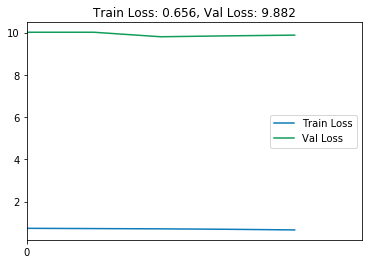

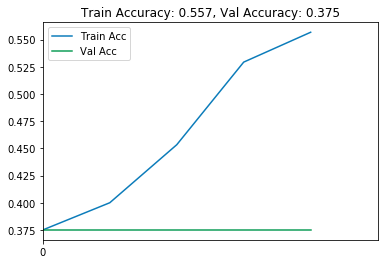

In [11]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['acc'])
    acc = smooth_curve(history.history['acc'][:steps])
    val_acc = smooth_curve(history.history['val_acc'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    
    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    
plot_compare(history, steps=50)